Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Support vector machines

Support vector machines (SVM) are primarily used for classification problems.
They are similar to several models we've already discussed.
First, SVM is, like logistic regression, a binary classification technique.
Second, SVM is similar to logistic regression mathematically but with a penalty parameter much like ridge regression.
Finally, SVM flexibly allows both linear and nonlinear modeling, making it a lot like linear discriminant analysis in the linear case as well as the nonlinear case if we use something called **the kernel trick**.

It is important to note that the term "support vector machine" tends to be used generically to cover both linear and nonlinear cases, as well as both SVM for classification and for regression.

### What you will learn

In the sections that follow you will learn about support vector machines and how to use them in a classifier.  We will study the following:

- Linear SVM
- Hard vs. soft margins
- Multi-way classification
- Nonlinear SVM

### When to use support vector machines

Support vector machines have similar use cases to logistic regression when the SVM is linear.
Both models allow for easy interpretation of predictor variables.
Both models allow for a penalization parameter, though in logistic regression, this is more of an add-on (e.g. logistic lasso).
Where the two models differ is in their underlying rationale: SVM is geometric and logistic regression is probabilistic.
In general, when you are thinking of using one, you might want to consider also trying the other, especially if you have performance problems.
Nonlinear SVM is a very different model and is more comparable to decision trees.
Like decision trees, nonlinear SVM can fit nonlinear data.
If you are thinking of using a tree-like model (random forests, gradient boosting, etc.), you may also want to try nonlinear SVM.

## Linear SVM

### Intuition

The basic idea of binary classification is to draw a line between the datapoints belonging to two different classes.
Consider the data table in Figure 1, which has two predictor variables $X_i$ and a class label, and the associated scatterplot with shaded circles depicting class `1` and hollow circles depicting class `0`.

<!-- | $X_1$ | $X_2$ | Class |
|-------|-------|-------|
| 0.50  | 0.10  | 0     |
| 0.60  | 0.12  | 0     |
| 0.63  | 0.09  | 0     |
| 0.62  | 0.20  | 0     |
| 0.70  | 0.16  | 0     |
| 0.70  | 0.22  | 0     |
| 0.80  | 0.23  | 0     |
| 0.90  | 0.22  | 0     |
| 0.10  | 0.65  | 1     |
| 0.11  | 0.83  | 1     |
| 0.15  | 0.61  | 1     |
| 0.16  | 0.76  | 1     |
| 0.14  | 0.90  | 1     |
| 0.20  | 0.87  | 1     |
| 0.22  | 0.63  | 1     |
| 0.23  | 0.80  | 1     |
 -->


<table><tr>
<td> 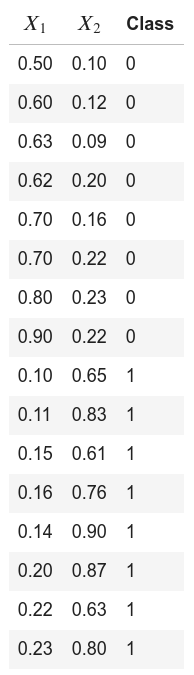 </td>
<td> 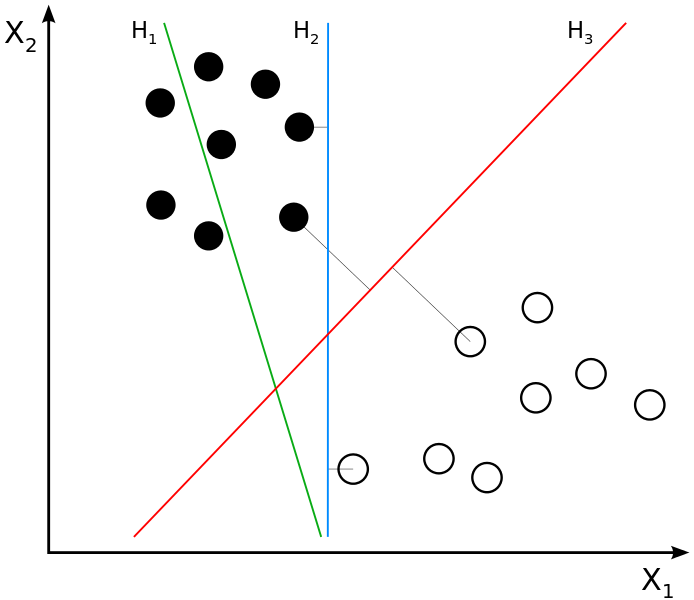 </td>
</tr></table>

<center><b>Figure 1. Data table and associated scatterplot showing possible decision boundaries between two classes.</b> Source: <a href="https://en.wikipedia.org/wiki/File:Svm_separating_hyperplanes_(SVG).svg">Wikipedia</a></center>

Figure 1 shows three possible decision boundaries through the datapoints, such that points to on side of the line (e.g. left) are classified `1` and the rest are classified `0`:

- $H_1$ is an example line with training error, because `1` is on both sides of the line, even though all `0` are to the right.
- $H_2$ is an example line with zero training error, because `1` and `0` are perfectly separated by the decision line
- $H_3$ is *another* example line with zero training error, but we intuitively prefer it because it **maximizes the distance between training points in both classes**

### Maximizing the margin

SVM build on this intuition: we would like to fit a line between the classes such that, if we padded it evenly on either side, it would touch points from both classes at the same time.
In SVM terminology, this padding is called **a margin**, and the goal of SVM is to fit a line **that maximizes the margin**.

Another way of thinking about this is blowing up a long straight ballon between the two classes until it touched points from both classes.
The direction of the balloon would be the direction of the decision boundary.

A trained linear SVM thus has an underlying linear form with parameters determined by maximizing the margin.
The datapoints on the boundary of the margin are called **support vectors** and are what give SVM its name.
An example fitted model (solid red), margins (dashed lines), and support vectors (dark outlined datapoints of both colors) is shown in Figure 2.

<!-- 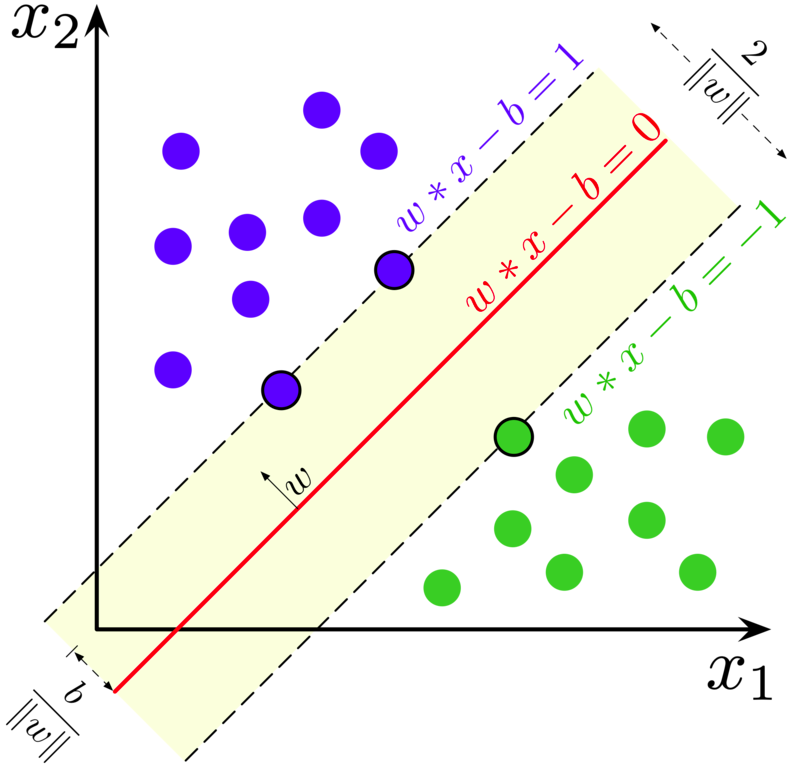 -->
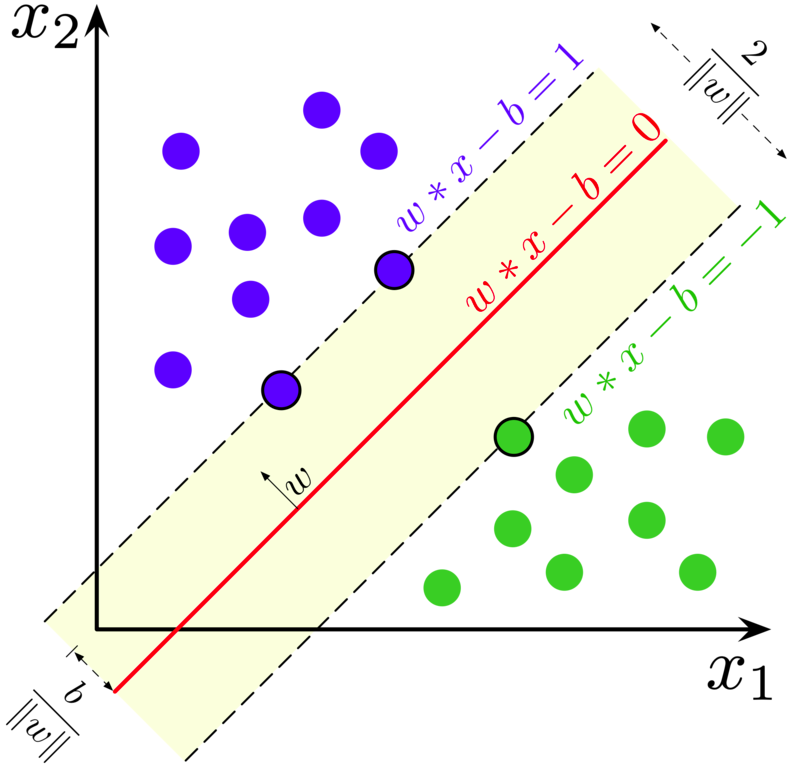
<center><b>Figure 2. Fitted SVM with decision boundary, margins, and support vectors indicated.</b> Source: <a href="https://en.wikipedia.org/wiki/File:SVM_margin.png">Wikipedia</a></center>

### Hard vs. soft margins

The fit in Figure 2 gives perfect performance on the training data because it is possible to draw a line between datapoints such that all datapoints on either side of the line belong to a single class.
When this is possible, the margin is called a **hard margin** because we did not have to relax the maximum margin constraint (as opposed to hard meaning difficulty).

However, often it is not possible to draw a perfect line like this, and the margin constraint must be relaxed.
When this happens, the margin become a **soft margin** analogous to the penalty parameter in ridge regression. 
The soft margin penalty tries to balance classification error with the "best" line, defined by the margin constraint.

### Beyond binary

While SVM is intrinsically binary, it is possible to construct N-way classifiers (i.e., more than 2 classes) by training multiple SVM models at once.
There are two common ways to train N-way SVM classifiers:

- **1 vs. 1** trains an SVM for each possible pair of classes, excluding the others. A new datapoint is run through all SVMs and given the class label it received most among the SVMs
- **1 vs. all** trains an SVM for each class, labeling the other classes as `0`. A new datapoint is run through all SVMs and given the class label which had the highest confidence among the SVMs.

Most software will take care of non-binary cases for you.

## Example: Linear SVM

### Load data

For this example, we'll use demographic and cardio measurement data to predict heart disease. 
There is no documentation for the meaning of the variables, so the descriptions below are approximate.

| Variable  | Type  | Description |
|:-----------|:-------|:-------------|
| Age       | Ratio | In years        |
| Sex       | Nominal | Sex, 1 = Male, 0 = Female        |
| ChestPain | Nominal | Chest pain experienced        |
| RestBP    | Ratio | Resting blood pressure        |
| Chol      | Ratio | Cholesterol in blood        |
| Fbs       | Nominal | Fasting blood sugar > 120 mg/dl, 1 = true; 0 = false          |
| RestECG   | Ordinal | resting electrocardiographic results         |
| MaxHR     | Ratio | Maximum heart rate        |
| ExAng     | Nominal |  Exercise induced angina, 1 = yes; 0 = no         |
| Oldpeak   | Ratio | ST depression induced by exercise relative to rest         |
| Slope     | Ordinal | The slope of the peak exercise ST segment         |
| Ca        | Ratio | Number of major vessels (0-3) colored by fluoroscopy         |
| Thal      | Nominal | Thal defect         |
| AHD       | Nominal | Atherosclerotic heart disease (class label)        |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/data.html">James et al. (2013)</a>.
</div>
<br>

The goal is to predict heart disease (`AHD`) using the other properties of the data.

Start by loading `readr`, `dplyr`, `base` and `tidyr` so we can read data into a dataframe and manipulate it:

- `library readr`
- `library dplyr`
- `library tidyr`
- `library base`

In [10]:
library(readr)
library(dplyr)
library(tidyr)
library(base)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><next><block type="import_R" id="AmB3B[T@UHq1l2P*NjUF"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field></block></next></block></next></block></next></block></xml>

Read the data into a dataframe, making the following variables factors:  `ChestPain`, `Thal`, and `AHD`: 
    
- Set `dataframe` to `with readr do read_csv`
    - using `"datasets/heart.csv"`
    - and `col_types =` `create list with`
        - `ChestPain = col_factor(c("typical","asymptomatic","nonanginal","nontypical"))`
        - `Thal = col_factor(c("fixed","normal","reversable"))`
        - `AHD = col_factor(c("Yes", "No"))`

- `dataframe` (to display)

In [11]:
dataframe = readr::read_csv("datasets/heart.csv",col_types= list(ChestPain = col_factor(c("typical","asymptomatic","nonanginal","nontypical")), Thal = col_factor(c("fixed","normal","reversable")), AHD = col_factor(c("Yes", "No"))))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="2"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/heart.csv</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock_R" id="RYL4tG}[/O+7T5y`XOuz"><field name="CODE">col_types=</field><value name="INPUT"><block type="lists_create_with" id="v9!JeAQQpiI0V_C_{b8V"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="T;?!5*rVItg^SgGp3_[N"><field name="CODE">ChestPain = col_factor(c("typical","asymptomatic","nonanginal","nontypical"))</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="{53!4Q1f^W2.-M3FR78)"><field name="CODE">Thal = col_factor(c("fixed","normal","reversable"))</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="0.{WR}9?5I:,qE-K#@fi"><field name="CODE">AHD = col_factor(c("Yes", "No"))</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No
62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,asymptomatic,164,176,1,2,90,0,1.0,2,2,fixed,Yes


Let's check for NA:

- `with base do summary`
    - using `dataframe`

In [12]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-185" y="73"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

      Age             Sex                ChestPain       RestBP     
 Min.   :29.00   Min.   :0.0000   typical     : 23   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   asymptomatic:144   1st Qu.:120.0  
 Median :56.00   Median :1.0000   nonanginal  : 86   Median :130.0  
 Mean   :54.44   Mean   :0.6799   nontypical  : 50   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000                      3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000                      Max.   :200.0  
                                                                    
      Chol            Fbs            RestECG           MaxHR      
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.00

There are just a few NAs in `Ca` and `Thal`.
Let's drop them:

- Set `dataframe` to 
    - `pipe`
        - `dataframe`
        - to with `tidyr` do `drop_na`

In [13]:
dataframe = dataframe %>%
    tidyr::drop_na()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="dSd/7cN]dxLi]5aOx*cL" x="-123" y="58"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="WqzxvhEZ*^+:9TR4`k|a"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="pKv|,Z}51#+5@KFVC#?K"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="LK.[Y8CK09Dk/~+7%`L9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value></block></value></block><block type="variables_get" id="Lhzu/}u)m#WNW|B9=Xj$" x="-139" y="188"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No
62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
41,1,nontypical,120,157,0,0,182,0,0.0,1,0,normal,No


### Explore data

Start by loading `ggplot2`, `psych`, `janitor`, `GGally` and `corrr`for exploring the data:

- `library ggplot2`
- `library psych`
- `library corrr`
- `library janitor`
- `library GGally`

In [14]:
library(janitor)
library(corrr)
library(base)
library(ggplot2)
library(psych)
library(GGally)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jSJYE[.$3mc!]5z4c{`@">janitor</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="import_R" id="k.,xSim.rEx|fK*WwVUR" x="-79" y="-48"><field name="libraryName" id="jSJYE[.$3mc!]5z4c{`@">janitor</field><next><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field><next><block type="import_R" id="]-EzVs8@-A8uc;R;)z%y"><field name="libraryName" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field></block></next></block></next></block></next></block></next></block></next></block></xml>


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Let's take a closer look with descriptive statistics:

- `with psych do describe`
    - using `dataframe`

In [15]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-260" y="1"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,297,54.5420875,9.0497357,56.0,54.72803347,8.89560,29,77.0,48.0,-0.217559560,-0.54972943,0.52511892
Sex,2,297,0.6767677,0.4685000,1.0,0.71966527,0.00000,0,1.0,1.0,-0.752070487,-1.43920181,0.02718513
ChestPain*,3,297,2.5319865,0.8580819,2.0,2.51464435,1.48260,1,4.0,3.0,0.316824259,-0.70447824,0.04979096
RestBP,4,297,131.6936027,17.7628064,130.0,130.48117155,14.82600,94,200.0,106.0,0.693014179,0.75577217,1.03070257
Chol,5,297,247.3501684,51.9975825,243.0,244.69874477,47.44320,126,564.0,438.0,1.106826979,4.30007077,3.01720576
Fbs,6,297,0.1447811,0.3524739,0.0,0.05857741,0.00000,0,1.0,1.0,2.008788724,2.04214201,0.02045261
RestECG,7,297,0.9966330,0.9949138,1.0,0.99581590,1.48260,0,2.0,2.0,0.006699597,-1.99311722,0.05773075
MaxHR,8,297,149.5993266,22.9415621,153.0,150.91213389,22.23900,71,202.0,131.0,-0.531132648,-0.09080465,1.33120445
ExAng,9,297,0.3265993,0.4697608,0.0,0.28451883,0.00000,0,1.0,1.0,0.735765216,-1.46354333,0.02725829


Let's do a few standard visualizations to better understand these data.

Create a correlation heatmap:

- `pipe`
    - `dataframe` 
    - to with `corrr` do `correlate`
    - then to with `corrr` do `rearrange`
    - then to with `corrr` do `shave`
    - then to `make plot`
        - with `corrr` do `rplot`
        - with  `ggplot2` do `theme`
            - using `axis.text.x = element_text(angle = 60, hjust = 1)`

Non-numeric variables removed from input: `ChestPain`, `Thal`, and `AHD`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


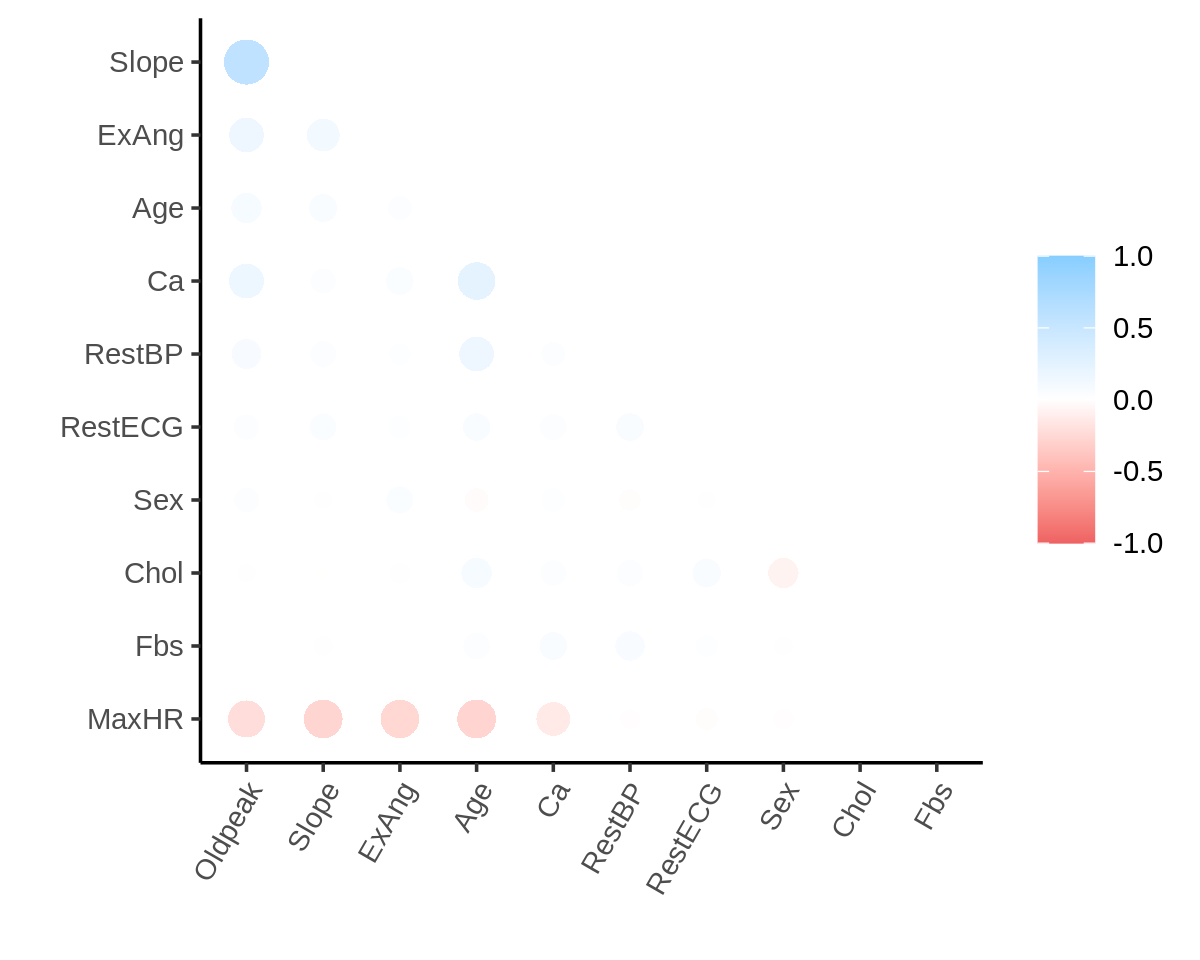

In [16]:
dataframe %>%
    corrr::correlate() %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot() +
    ggplot2::theme(axis.text.x = element_text(angle = 60, hjust = 1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="N12|vt`l[nbbEa%Y~#m8" x="-52" y="-175"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="gVhqUlh8Cy^F.8HkQSR$"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="!IGLlvXdM16CaY84=Bg6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="}:lkTT23H2F#0KMm`|,/"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="O/(t7,oDux_+[+q!kGh6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD3"><block type="ggplot_plus_R" id="3ilR0aqrIo(uJr*!6bpU"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="=#E:Zp_ck$*)mk/i8`^K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="f#R*ao;9?HYu9{XmEY3r"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">theme</field><data>ggplot2:theme</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@ce!p}8ffHehsPmXP[bV"><field name="CODE">axis.text.x = element_text(angle = 60, hjust = 1)</field></block></value></block></value></block></value></block></xml>

This time almost none of the measures are correlated with each other, except for several with `MaxHR` and `Slope`/`Oldpeak`.

We could do some more exploratory work here with scatterplots of the variables, but we don't expect to see very much if there are basically no correlations - unless of course there are nonlinear relationships.

We could also do histograms to see how the predictor variables are distributed if we wanted to.
This would potentially tell us if any of them had problematic distributions or outliers.

Since our scatter matrix gives us density plots on the diagonal, which are similar to histograms, lets do that to capture both the scatterplots and histograms at once, but increase the plot area first:

- with `base` do `options`
    - using `repr.plot.width = 7`

- with `base` do `options`
    - using `repr.plot.height = 7`

- `pipe`
    - `dataframe`
    - to with `GGally` do `ggpairs`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

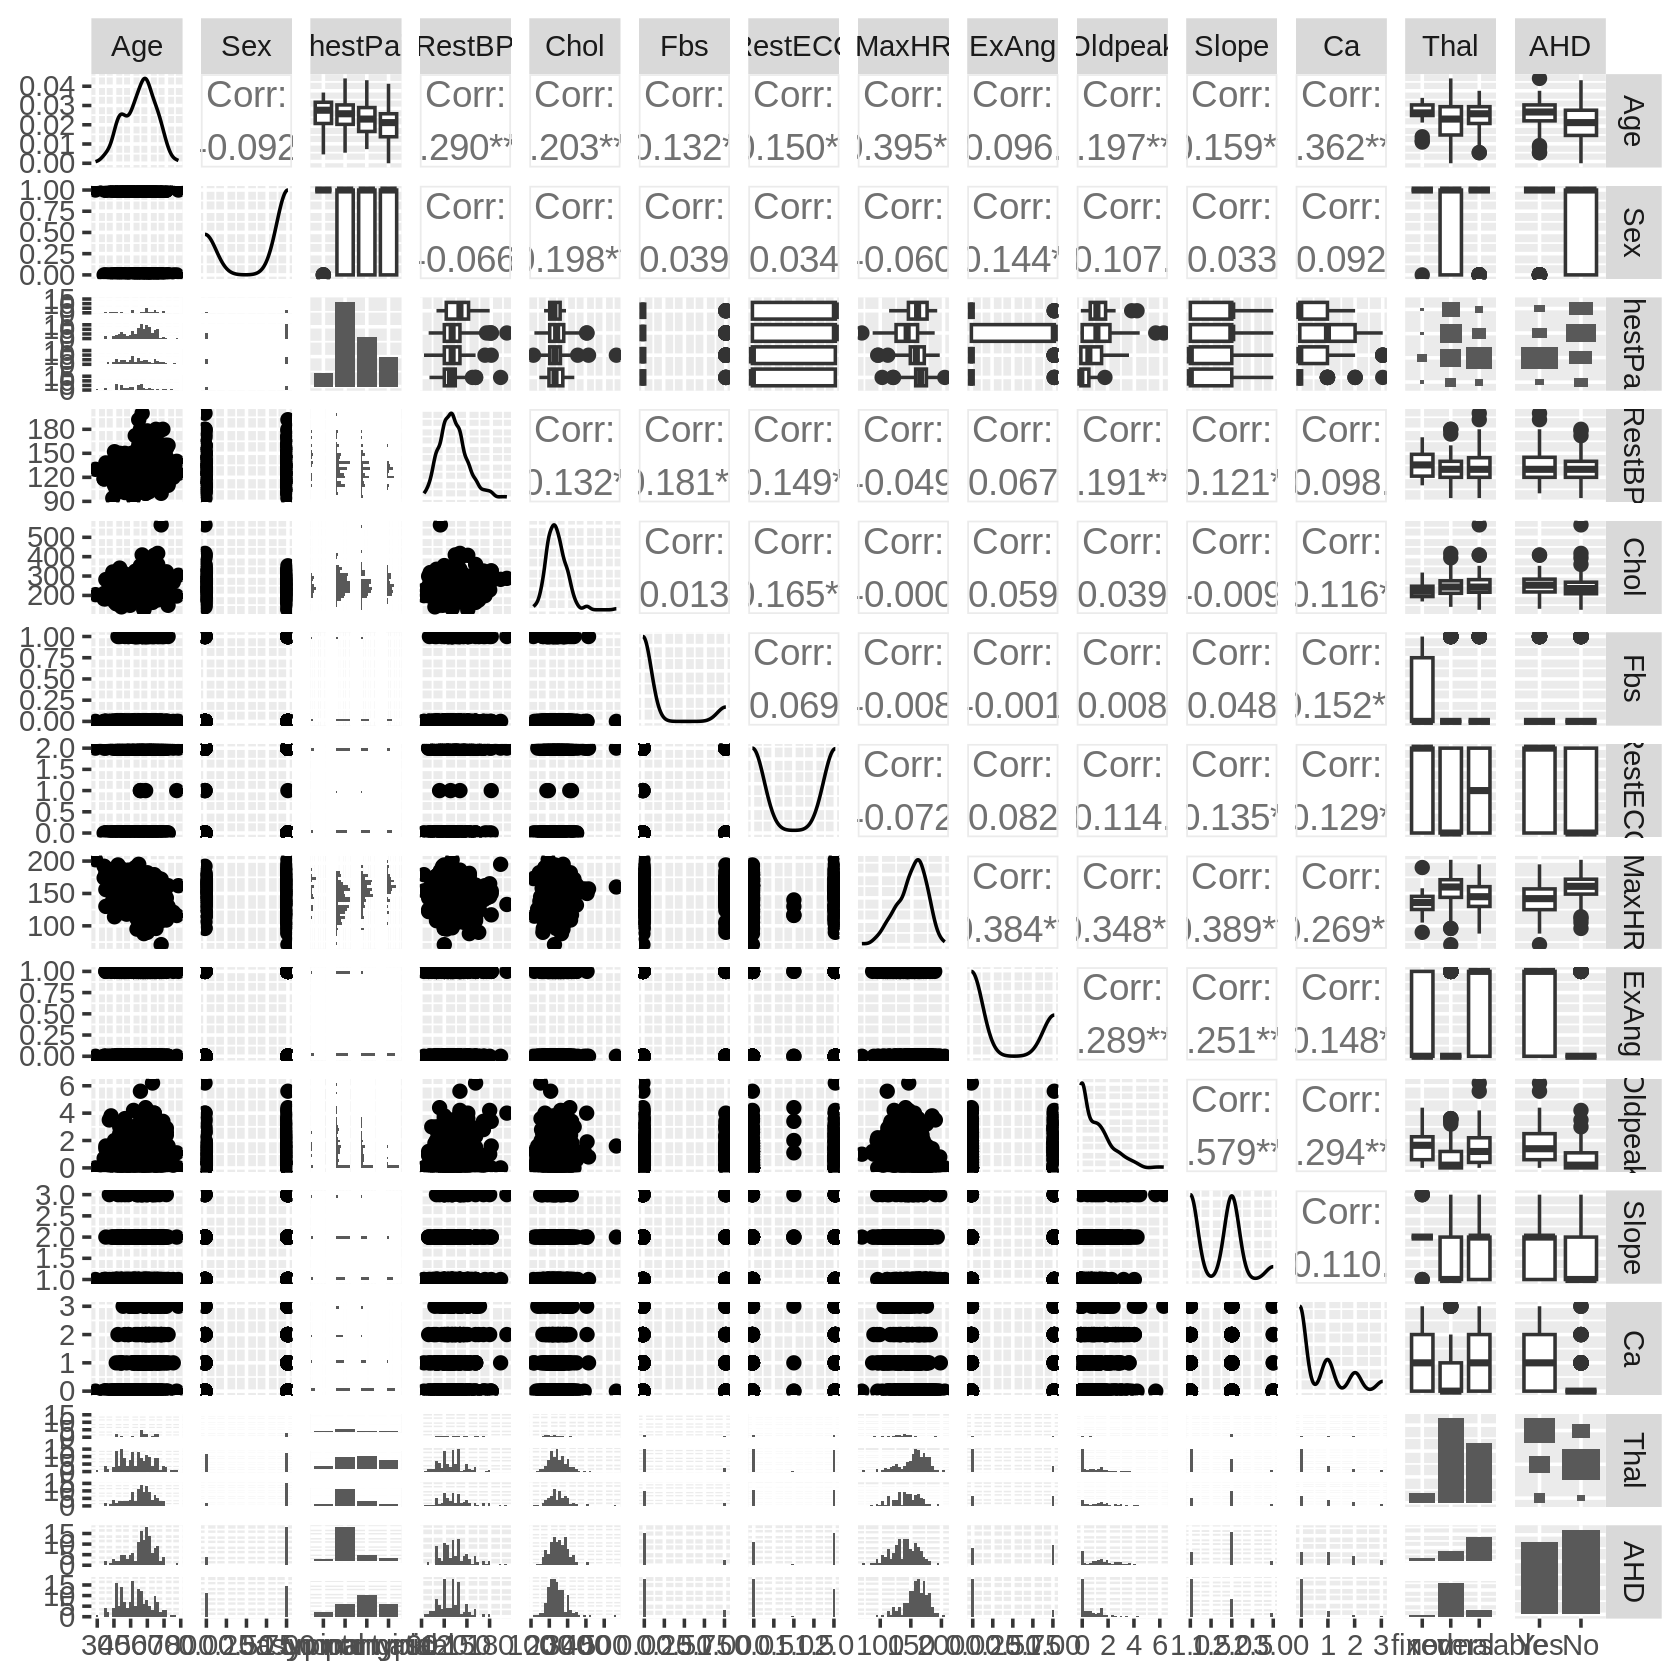

In [17]:
base::options(repr.plot.height = 7)

base::options(repr.plot.width = 7)

dataframe %>%
    GGally::ggpairs()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="varDoMethod_R" id="bPBTU}En)n#+`:r9%Yw(" x="-153" y="-71"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="8(cB^zT$+0LJXdUD1~.,"><field name="CODE">repr.plot.height = 7</field></block></value></block><block type="varDoMethod_R" id="`OVkK$M+w#9I*0v*SgBU" x="-125" y="-15"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="f..+}M5G%}EF%Cx$oLp-"><field name="CODE">repr.plot.width = 7</field></block></value></block><block type="pipe_R" id="}wC%Vv;WrPYG)0o[vPs+" x="-170" y="94"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="z3SLzmZ|CtF.SVlj:D:P"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="ioP~1S4U+?~Wt=f%+P,+"><mutation items="1"></mutation><field name="VAR" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field><field name="MEMBER">ggpairs</field><data>GGally:ggpairs</data></block></value></block></xml>

As expected, the scatterplots don't show us much because we didn't have many strong correlations to begin with.
Additionally, the moderate correlations we did have, e.g. with `MaxHR`/other variables and `Slope`/`Oldpeak` show up on the scatterplot as lines because the correlating variable is nominal or ordinal.

In terms of distributions, we do see some variables that are not normal/skewed (on the diagonal).
But again most of these are nominal/ordinal except for `Oldpeak` and `Ca`, which both seem to have some correlation with the class variable `AHD`.
Based on the boxplots, only `Oldpeak` seems to have outliers that we *might* worry about.

Next, lets take a closer look at how `AHD` is distributed, though from the scatter matrix we know it is close to balanced:

- `with janitor do tabyl`
     - using `dataframe`
     - and `AHD`

In [18]:
janitor::tabyl(dataframe,AHD)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jSJYE[.$3mc!]5z4c{`@">janitor</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="AlJM%Y|L}Ls,SeRMSB1}" x="-236" y="-140"><mutation items="2"></mutation><field name="VAR" id="jSJYE[.$3mc!]5z4c{`@">janitor</field><field name="MEMBER">tabyl</field><data>janitor:tabyl</data><value name="ADD0"><block type="variables_get" id="N$,X%5c#Ws1{lF;x$qac"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="8e;;h.O(yqrQnR#k1!Ac"><field name="CODE">AHD</field></block></value></block></xml>

AHD,n,percent
<fct>,<int>,<dbl>
Yes,137,0.4612795
No,160,0.5387205


`Yes`/`No` heart disease are approximately balanced, with `No` being slightly more common, ~54% of the total data.

### Prepare train/test sets


We need to split the dataframe into training data and testing data.

First, load the package for splitting:

- `library rsample`

In [19]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="aFBwKpYz$V@3rI9Nk71a" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Now split the data, but first specify a random seed so your results match mine.
           
- with `base` do `set.seed` using `2`

- Set `data_split` to `with rsample do initial split`
    - using `dataframe`
    - and `prop=.80`
- Set `data_train` to `with rsample do training`
    - using `data_split`
- Set `data_test` to `with rsample do testing`
    - using `data_split`
- `data_train`


In [20]:
base::set.seed(2)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="Bs.?L_yk:!JU:!D9$e:2" x="-107" y="198"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="y3|#H:ii-(np[L}nH,7)"><field name="NUM">2</field></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
50,0,asymptomatic,110,254,0,2,159,0,0.0,1,0,normal,No
61,1,asymptomatic,138,166,0,2,125,1,3.6,2,1,normal,Yes
66,0,nonanginal,146,278,0,2,152,0,0.0,2,1,normal,No
58,1,asymptomatic,128,259,0,2,130,1,3.0,2,2,reversable,Yes
53,1,nonanginal,130,246,1,2,173,0,0.0,1,3,normal,No
44,1,asymptomatic,110,197,0,2,177,0,0.0,1,1,normal,Yes
51,1,nonanginal,94,227,0,0,154,1,0.0,1,1,reversable,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,nonanginal,130,253,0,0,179,0,0.0,1,0,normal,No


### Fit model

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`:

- `library recipes`
- `library workflows`
- `library parsnip`
- `library generics`
- `library hardhat`
- `library broom`

In [21]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Let's make a workflow to predict `AHD` with SVM and a step that standardizes numeric predictors.
**SVM is very sensitive to standardization.**

- Set `recipe` to 
    - `pipe` with `recipes` do `recipe`
        - using `AHD ~ .`
        - and `data = data_train`
    - to with `recipes` do `step_normalize`
        - using with `recipes` do `all_numeric_predictors`
- Set `model` to 
    - `pipe` with `parsnip` do `svm_linear` 
        - using `cost =  1`
    - to with `parsnip` do `set_mode` 
        - using `"classification"`
    - then to with `parsnip` do `set_engine`
        - using `"kernlab"`
- Set `workflow` to 
    - `pipe` with `workflows` do `workflow`
    - to with `workflows` do `add_model`
        - using `model`
    - then to with `workflows` do `add_recipe` 
        - using `recipe`
        
*Note: `cost =  1` is the SVM penalty parameter.* 

In [22]:
recipe = recipes::recipe(AHD ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::svm_linear(cost =  1) %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("kernlab")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="77" y="213"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">AHD ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="DEvi*v6Y{#}d{h35/S#3"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">svm_linear</field><data>parsnip:svm_linear</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="iP`lGU_Nf!$/q0V2={b8"><field name="CODE">cost =  1</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">kernlab</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow:

-  Set `trained_model` to with `generics` do `fit`
    - using `workflow`
    - and `data = data_train`
`trained_model`

In [23]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></xml>

 Setting default kernel parameters  


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: svm_linear()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 86 

Objective Function Value : -76.81 
Training error : 0.122363 
Probability model included. 

Now use `augment` to get predictions.

- Set `data_evaluation` to with `generics` do `augment`
    - `trained_model`
    - `data_test`
- `data_evaluation`

In [24]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF" x="-188" y="165"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></xml>

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,.pred_class,.pred_Yes,.pred_No
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,No,0.1034135,0.89658650
52,1,nonanginal,172,199,1,0,162,0,0.5,1,0,reversable,No,No,0.1548570,0.84514305
58,1,nonanginal,132,224,0,2,173,0,3.2,1,2,reversable,Yes,Yes,0.7749850,0.22501498
40,1,asymptomatic,110,167,0,2,114,1,2.0,2,0,reversable,Yes,Yes,0.8802419,0.11975809
69,0,typical,140,239,0,0,151,0,1.8,1,2,normal,No,No,0.2512160,0.74878404
60,1,asymptomatic,117,230,1,0,160,1,1.4,1,2,reversable,Yes,Yes,0.8448602,0.15513981
55,1,asymptomatic,132,353,0,0,132,1,1.2,2,1,reversable,Yes,Yes,0.9247195,0.07528054
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,0,nontypical,136,319,1,2,152,0,0.0,1,2,normal,Yes,No,0.30921026,0.69078974


### Evaluate the model

First load `yardstick` to get performance metrics:

- `library yardstick`

In [ ]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="AZq!7y:AKY3O6PsjAWMu" x="-161" y="10"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

To get the accuracy, recall, precision, and F1 do the following:

- `pipe`
    - `create list with`
        - with `yardstick` do `accuracy`
            - using `data_evaluation`
            - and `truth=AHD`
            - and `estimate=.pred_class`
        - with `yardstick` do `precision`
            - using `data_evaluation`
            - and `truth=AHD`
            - and `estimate=.pred_class`
        - with `yardstick` do `recall`
            - using `data_evaluation`
            - and `truth=AHD`
            - and `estimate=.pred_class`
        - with `yardstick` do `f_meas`
            - using `data_evaluation`
            - and `truth=AHD`
            - and `estimate=.pred_class`

In [25]:
list(yardstick::accuracy(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::precision(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::recall(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::f_meas(data_evaluation,truth=AHD,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="n:|F(r?P|^4inAx3PqFZ"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id=":qt8OD9;Au+.@WF}CY$@"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="{~pcwmOK5=}7-KN18T%e"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="Dp]`|Qqrb4?=dU-1o?_o"><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8000000
precision,binary,0.8800000
recall,binary,0.7096774
f_meas,binary,0.7857143


Performance is reasonably good for `AHD=1` (which we specified as the first level when we read the data.
If we wanted, we could get the same metrics for `AHD=0`.

### Visualizing

#### Feature importance

Because linear SVM uses a line as a model, we can visualize feature importance using the coefficients.
However, the coefficients are not cleanly returned in the `kernlab` model, so we need to do some work to get them:

- Set `temp` to 
    - `pipe`
        - `trained_model`
        - to with `hardhat` do `extract_fit_engine`

- `pipe`
    - `temp@coef[[1]] %*% temp@xmatrix[[1]]`
    - to with `base` do `data.frame`
    - then to with `tidyr` do `pivot_longer`
        - using `everything()`
    - then to with `dplyr` do `arrange`
        -using `value`
        
*Note: The first line of the second pipe is key to get the coefficients; the rest reformats them into a dataframe and sorts them.*

In [40]:
temp = trained_model %>%
    hardhat::extract_fit_engine()

temp@coef[[1]] %*% temp@xmatrix[[1]] %>%
    base::data.frame() %>%
    tidyr::pivot_longer(everything()) %>%
    dplyr::arrange(value)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t]+H-8+H*^PHWBKOQ@|G">temp</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id=".GndRVXmS84;HLmc6C$c" x="-185" y="-244"><field name="VAR" id="t]+H-8+H*^PHWBKOQ@|G">temp</field><value name="VALUE"><block type="pipe_R" id="z*HRya_)(BZHP8tWUNIf"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="@FZqGyFh/[JJetV_V$Q0"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="95oga4*Q1BzIvsE9B`o."><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block><block type="pipe_R" id="Xix3:J8axC3UHZiSK|Ld" x="-190" y="-109"><mutation items="3"></mutation><value name="INPUT"><block type="dummyOutputCodeBlock_R" id="G$~TpfQ_.yTUPqu.rec`"><field name="CODE">temp@coef[[1]] %*% temp@xmatrix[[1]] </field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Qqan[6;a8lD]!|VD6a;w"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">data.frame</field><data>base:data.frame</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="d/DD^jOiy[3X`.FckEcG"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">pivot_longer</field><data>tidyr:pivot_longer</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="s8[1.dd#~w8,G^4-syUP"><field name="CODE">everything()</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="aiA[(v_v`3LRoR_?Gucr"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="#]dA.9%hF?5T1$U7Te|U"><field name="CODE">value</field></block></value></block></value></block></xml>

name,value
<chr>,<dbl>
Thalreversable,-1.0100587
Ca,-0.9943247
ChestPainasymptomatic,-0.6181513
ExAng,-0.3713070
Oldpeak,-0.3625683
Sex,-0.3296460
RestBP,-0.2677170
⋮,⋮
Chol,-0.1404955


The most important features for no AHD are:

- Thal being reversible
- Ca: Number of major vessels (0-3) colored by fluoroscopy
- ChestPain being asymptomatic

And for having AHD are:

- ChestPain no anginal
- Age being higher
- MaxHR being higher

These seem to make sense, but it would take additional medical knowledge to know for sure.

## Nonlinear SVM

We've already talked about how some datasets may not be perfectly separable by a line, and so need a soft margin, but there are some problems that simply aren't linear at all.

Consider the plot on the left hand side of Figure 3.
One class only exists in the orange circle, and the other class only exists outside it.
There is no line that could be drawn through the datapoints that would do well.

Now consider the plot on the right hand side of Figure 3.
*This is the same data*, but projected into the third dimension using $z = a^2 + b^2$.
In other words, the new "up" dimension on the right hand side is just the sum of the squared coordinates on the "bottom" of the plot.
Because the original coordinates in the circle are small when squared and added together, they are "lower" in the plot on the right, and the coordinates outside the circle are "higher".
In fact, we could cut a plane between the two classes in the right hand plot as a result of this transformation.

This is the key idea of nonlinear SVM: **transform the data into a new space where the classes are linearly separable, then solve like regular SVM.**
The function we use to transform the data is called a **kernel**, and there are many possible kernels.
The "kernel trick" is a way of doing this efficiently on a computer using some interesting ideas from math.

<!-- 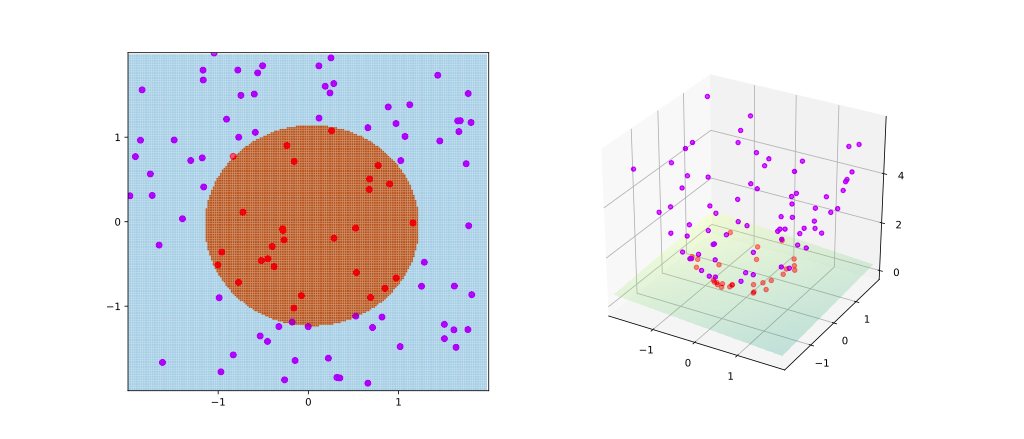 -->
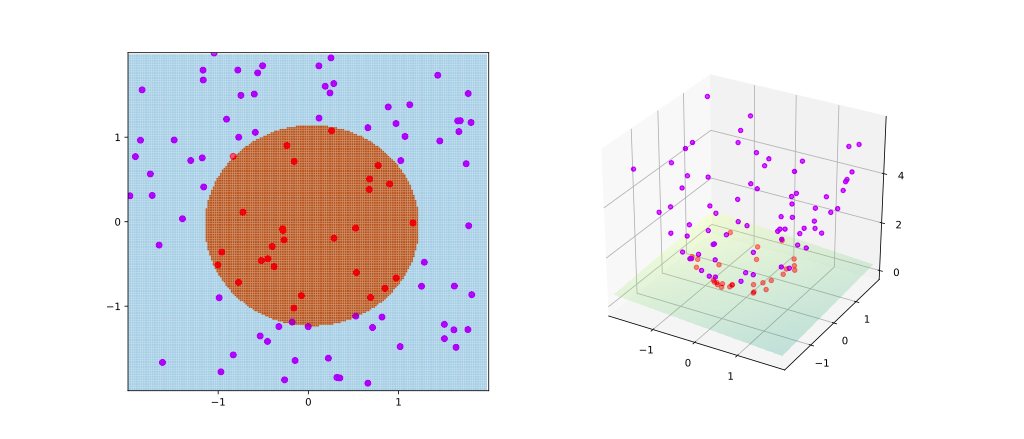
<center><b>Figure 3. A training example of SVM with kernel given by $φ((a, b)) = (a, b, a^2 + b^2)$.</b> Source: <a href="https://en.wikipedia.org/wiki/File:Kernel_trick_idea.svg">Wikipedia</a></center>

From a practical standpoint, the only different thing about nonlinear SVM is what kernel to choose.

## Example: Nonlinear SVM

We'll use the same `heart` data as before, and compare our results to the linear SVM

### Fit model

We're going to make a pipeline so we can scale and train in one step.
Copy the blocks above for the linear case below, but change `svm_linear` to `svm_rbf`.

In [50]:
recipe = recipes::recipe(AHD ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::svm_rbf(cost =  1) %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("kernlab")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="77" y="213"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">AHD ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="DEvi*v6Y{#}d{h35/S#3"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">svm_rbf</field><data>parsnip:svm_rbf</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="iP`lGU_Nf!$/q0V2={b8"><field name="CODE">cost =  1</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">kernlab</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow by copying the blocks for the linear case below.

In [51]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: svm_rbf()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0505632256926101 

Number of Support Vectors : 128 

Objective Function Value : -86.5337 
Training error : 0.088608 
Probability model included. 

Now use `augment` to get predictions  by copying the blocks for the linear case below.

In [52]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF" x="-188" y="165"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></xml>

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,.pred_class,.pred_Yes,.pred_No
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,No,0.04452754,0.95547246
52,1,nonanginal,172,199,1,0,162,0,0.5,1,0,reversable,No,No,0.12181744,0.87818256
58,1,nonanginal,132,224,0,2,173,0,3.2,1,2,reversable,Yes,Yes,0.88070208,0.11929792
40,1,asymptomatic,110,167,0,2,114,1,2.0,2,0,reversable,Yes,Yes,0.88354103,0.11645897
69,0,typical,140,239,0,0,151,0,1.8,1,2,normal,No,No,0.26253359,0.73746641
60,1,asymptomatic,117,230,1,0,160,1,1.4,1,2,reversable,Yes,Yes,0.89864154,0.10135846
55,1,asymptomatic,132,353,0,0,132,1,1.2,2,1,reversable,Yes,Yes,0.98340461,0.01659539
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,0,nontypical,136,319,1,2,152,0,0.0,1,2,normal,Yes,No,0.13450592,0.865494078


### Evaluate the model

Get the accuracy, recall, precision, and F1  by copying the blocks for the linear case below.

In [53]:
list(yardstick::accuracy(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::precision(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::recall(data_evaluation,truth=AHD,estimate=.pred_class), yardstick::f_meas(data_evaluation,truth=AHD,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="n:|F(r?P|^4inAx3PqFZ"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id=":qt8OD9;Au+.@WF}CY$@"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="{~pcwmOK5=}7-KN18T%e"><field name="CODE">truth=AHD</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="Dp]`|Qqrb4?=dU-1o?_o"><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7833333
precision,binary,0.8461538
recall,binary,0.7096774
f_meas,binary,0.7719298


Performance is 1% lower than linear SVM, showing that if the problem is linearly separable, that can be a better kernel choice!

### Visualizing

#### Feature importance

Get feature importances  by copying the blocks for the linear case below. 

In [55]:
temp = trained_model %>%
    hardhat::extract_fit_engine()

temp@coef[[1]] %*% temp@xmatrix[[1]] %>%
    base::data.frame() %>%
    tidyr::pivot_longer(everything()) %>%
    dplyr::arrange(value)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t]+H-8+H*^PHWBKOQ@|G">temp</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id=".GndRVXmS84;HLmc6C$c" x="-185" y="-244"><field name="VAR" id="t]+H-8+H*^PHWBKOQ@|G">temp</field><value name="VALUE"><block type="pipe_R" id="z*HRya_)(BZHP8tWUNIf"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="@FZqGyFh/[JJetV_V$Q0"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="95oga4*Q1BzIvsE9B`o."><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block><block type="pipe_R" id="Xix3:J8axC3UHZiSK|Ld" x="-190" y="-109"><mutation items="3"></mutation><value name="INPUT"><block type="dummyOutputCodeBlock_R" id="G$~TpfQ_.yTUPqu.rec`"><field name="CODE">temp@coef[[1]] %*% temp@xmatrix[[1]] </field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Qqan[6;a8lD]!|VD6a;w"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">data.frame</field><data>base:data.frame</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="d/DD^jOiy[3X`.FckEcG"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">pivot_longer</field><data>tidyr:pivot_longer</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="s8[1.dd#~w8,G^4-syUP"><field name="CODE">everything()</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="aiA[(v_v`3LRoR_?Gucr"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="#]dA.9%hF?5T1$U7Te|U"><field name="CODE">value</field></block></value></block></value></block></xml>

name,value
<chr>,<dbl>
Ca,-15.666985
ExAng,-9.738572
Oldpeak,-9.484772
ChestPainasymptomatic,-9.386779
Thalreversable,-8.058802
Sex,-6.521139
RestBP,-5.694779
⋮,⋮
Chol,1.661503


These features are about the same as the old features, with some slight shifting up/down in importance.

## What about `C`, the regularization term?

We haven't adjusted `C`, i.e. using a freestyle like `C=2.0` when fitting the model.
Like several other parameters we have encountered (K in KNN, regularization terms for lasso/ridge regression, the number of models when boosting), this is a parameter that ideally is found from the data itself.
We'll talk more about methods for this later on.

<!--  -->